In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/bikes_rent.csv")

In [4]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [17]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV

Коэффициенты регрессии:
[-1057.28701717]
Смещение:
5979.6330472103


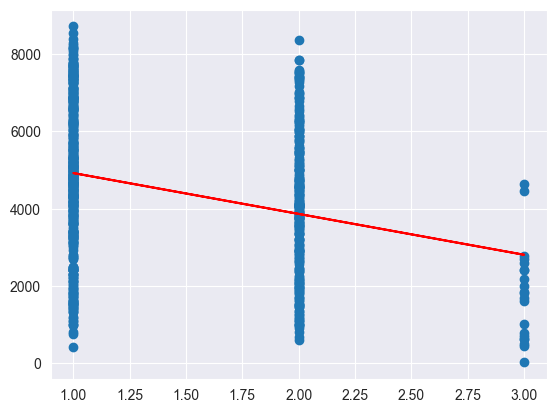

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Выбираем признаки и целевую переменную
X = df[['weathersit']]
y = df['cnt']

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель
model.fit(X, y)

# Печатаем коэффициенты регрессии
print("Коэффициенты регрессии:")
a = model.coef_
print(a)
print("Смещение:")
b = model.intercept_
print(b)

# Строим график прямой линии регрессии
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()


In [6]:
(a * 1 + b)

array([4922.34603004])

In [8]:
from sklearn.linear_model import Lasso

# Создаем модель Lasso
model = Lasso(alpha=0.1)

# Обучаем модель
model.fit(X, y)

# Печатаем коэффициенты регрессии
print("Коэффициенты регрессии:")
print(model.coef_)

# Выбираем признак, который оказывает наибольшее влияние на cnt
max_coef_index = np.argmax(np.abs(model.coef_))
max_coef_feature = X.columns[max_coef_index]

print(max_coef_feature)
print(max_coef_index)

print("Признак, который оказывает наибольшее влияние на cnt:")
print(max_coef_feature)


Коэффициенты регрессии:
[-1056.94975322]
weathersit
0
Признак, который оказывает наибольшее влияние на cnt:
weathersit
